# **Agrupamento**

Não supervisionada -> Agrupamento (Clustering) -> Agrupar dados por características (idades, gostos..)

**Agrupamento (Clustering)**

Aplicado em problemas de aprendizagem não supervisionada.

Realiza agrupamento de dados com base em características similares.

Exemplos:
- Identificação de perfis de clientes.
- Segmentação de produtos semelhantes.
- Agrupamento de sintomas característicos de doenças.
- Perfis nos streaming (Netflix, Spotify, Globoplay..)



# **APRENDIZAGEM NÃO SUPERVISIONADA: AGRUPAMENTO**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para agrupar clientes de um shopping.

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/shwetabh123/mall-customers

In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [4]:
df.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

**ATRIBUTOS:**

CustomerID: identificação do cliente.

Genre: Gênero.

Age: idade.

Annual Income (k$): Rendimento anual.

Spending Score (1 a 100): Pontuação de gastos.

**IDADE**

In [5]:
import plotly.express as px

In [6]:
hist =  px.histogram (df,  x = "Age", nbins=60) 
hist.update_layout(width=600,height=400,title_text='Distribuição das idades') 
hist.show()

**GÊNERO**

In [7]:
df['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [8]:
import seaborn as sns

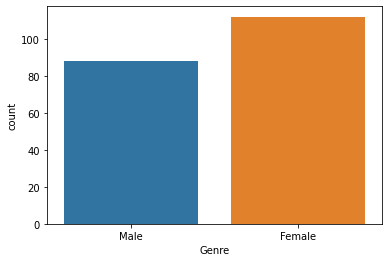

In [9]:
sns.countplot(x='Genre', data=df);

In [10]:
df.shape

(200, 5)

# **EXPLORAÇÃO E TRATAMENTO DOS DADOS**

**Alterando nomes das colunas**

In [11]:
df.head(2)

CustomerID Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1  Male   19                  15                      39
1           2  Male   21                  15                      81

In [12]:
df.rename(columns={'CustomerID': 'identificacao'}, inplace=True)

In [13]:
df.rename(columns={'Genre': 'genero'}, inplace=True)
df.rename(columns={'Age': 'idade'}, inplace=True)

In [14]:
df.rename(columns={'Annual Income (k$)': 'rendimento','Spending Score (1-100)':'pontuacao'}, inplace=True) 

In [15]:
df.head(3)

identificacao  genero  idade  rendimento  pontuacao
0              1    Male     19          15         39
1              2    Male     21          15         81
2              3  Female     20          16          6

**Valores Missing (NAN) (Valores Faltantes)**

In [16]:
# RELAÇÃO DA QUANTIDADE
df.isnull().sum()

identificacao    0
genero           0
idade            0
rendimento       0
pontuacao        0
dtype: int64

**Análise dos tipos de atributos**

In [17]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
df.dtypes

identificacao     int64
genero           object
idade             int64
rendimento        int64
pontuacao         int64
dtype: object

**Dados Estatísticos**

In [18]:
df.describe()

identificacao       idade  rendimento   pontuacao
count     200.000000  200.000000  200.000000  200.000000
mean      100.500000   38.850000   60.560000   50.200000
std        57.879185   13.969007   26.264721   25.823522
min         1.000000   18.000000   15.000000    1.000000
25%        50.750000   28.750000   41.500000   34.750000
50%       100.500000   36.000000   61.500000   50.000000
75%       150.250000   49.000000   78.000000   73.000000
max       200.000000   70.000000  137.000000   99.000000

**Análise dos outliers**

In [19]:
import plotly.express as px

In [20]:
boxplot = px.box(df, y="rendimento")
boxplot.show()

In [21]:
boxplot = px.box(df, y="idade")
boxplot.show()

In [22]:
boxplot = px.box(df, y="pontuacao")
boxplot.show()

# **PRÉ-PROCESSAMENTO**

In [23]:
df.head(2)

identificacao genero  idade  rendimento  pontuacao
0              1   Male     19          15         39
1              2   Male     21          15         81

**Excluir identificação do cliente**

In [24]:
df2 = df.drop(labels = 'identificacao', axis = 1)

In [25]:
df2.head(2)

genero  idade  rendimento  pontuacao
0   Male     19          15         39
1   Male     21          15         81

**Transformar variáveis categóricas em numéricas**

In [26]:
df2['genero'].replace({'Female': 0, 'Male': 1}, inplace=True)

In [27]:
df2.head(3)

genero  idade  rendimento  pontuacao
0       1     19          15         39
1       1     21          15         81
2       0     20          16          6

**Escalonamento**

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
escala = StandardScaler()
df2_esc = escala.fit_transform(df2)

In [30]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

# **K-MEANS COM DOIS ATRIBUTOS**

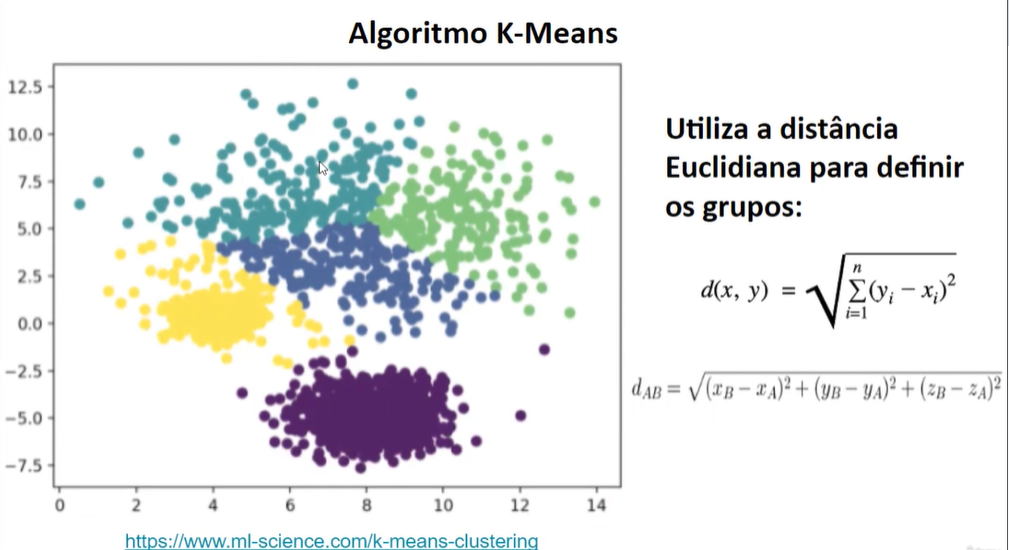

---

**Definição do número de Clusters**

**Elbow Method**
  * Tessta vários valores de k.
  * Define o número de clusters através do ponto de inflexão no gráfico do WCSS (Within Clusters Sum of Squares) em função do número de clusters.




https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [31]:
df2.head()

genero  idade  rendimento  pontuacao
0       1     19          15         39
1       1     21          15         81
2       0     20          16          6
3       0     23          16         77
4       0     31          17         40

In [32]:
dados = df2.iloc[:, [2,3]].values

In [33]:
dados

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

**Elbow Method**

In [34]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(dados)
    # inertia: Método para gerar o wcss
    wcss.append(kmeans.inertia_)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

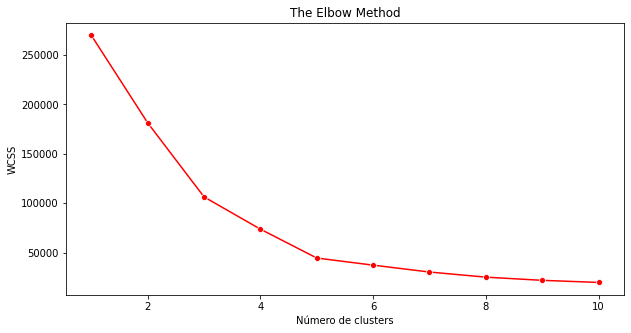

In [36]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [37]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)

In [38]:
kmeans1 = kmeans.fit(dados)

In [39]:
# Coordenadas dos Centróides
centroides = kmeans1.cluster_centers_
centroides

array([[48.26      , 56.48      ],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [87.        , 18.63157895]])

In [40]:
# Classificação dos dados
classificacao = kmeans1.labels_
classificacao

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [41]:
dados[3,:]

array([16, 77])

In [42]:
classificacao[3]

0

In [43]:
import plotly.express as px
import plotly.graph_objects as go

In [44]:
graf1 = px.scatter(x = dados[:,0], y = dados[:,1], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means')
graf3.update_xaxes(title = 'Rendimento anual (K$)')
graf3.update_yaxes(title = 'Pontuação')
graf3.show()

In [45]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

Grupo
0        2
1        0
2        2
3        0
4        2
..     ...
195      1
196      3
197      1
198      3
199      1

[200 rows x 1 columns]

In [46]:
df3 = pd.concat([df, agrupamento],axis=1)
df3

identificacao  genero  idade  rendimento  pontuacao  Grupo
0                1    Male     19          15         39      2
1                2    Male     21          15         81      0
2                3  Female     20          16          6      2
3                4  Female     23          16         77      0
4                5  Female     31          17         40      2
..             ...     ...    ...         ...        ...    ...
195            196  Female     35         120         79      1
196            197  Female     45         126         28      3
197            198    Male     32         126         74      1
198            199    Male     32         137         18      3
199            200    Male     30         137         83      1

[200 rows x 6 columns]

In [47]:
df3.iloc[150 , :]

identificacao     151
genero           Male
idade              43
rendimento         78
pontuacao          17
Grupo               3
Name: 150, dtype: object

In [48]:
df3.loc[df3.identificacao == 92] 

identificacao genero  idade  rendimento  pontuacao  Grupo
91             92   Male     18          59         41      0

In [49]:
grupo0 = df3.loc[df3.Grupo == 0]
grupo0 

identificacao  genero  idade  rendimento  pontuacao  Grupo
1                2    Male     21          15         81      0
3                4  Female     23          16         77      0
5                6  Female     22          17         76      0
7                8  Female     23          18         94      0
9               10  Female     30          19         72      0
..             ...     ...    ...         ...        ...    ...
118            119  Female     51          67         43      0
119            120  Female     50          67         57      0
120            121    Male     27          67         56      0
121            122  Female     38          67         40      0
122            123  Female     40          69         58      0

[100 rows x 6 columns]

In [50]:
grupo0.shape

(100, 6)

In [51]:
grupo1 = df3.loc[df3.Grupo == 1]
grupo1

identificacao  genero  idade  rendimento  pontuacao  Grupo
123            124    Male     39          69         91      1
125            126  Female     31          70         77      1
127            128    Male     40          71         95      1
129            130    Male     38          71         75      1
131            132    Male     39          71         75      1
133            134  Female     31          72         71      1
135            136  Female     29          73         88      1
137            138    Male     32          73         73      1
139            140  Female     35          74         72      1
141            142    Male     32          75         93      1
143            144  Female     32          76         87      1
145            146    Male     28          77         97      1
147            148  Female     32          77         74      1
149            150    Male     34          78         90      1
151            152    Male     39          78         88      1
153            154  Female     38          78         76      1
155            156  Female     27          78         89      1
157            158  Female     30          78         78      1
159            160  Female     30          78         73      1
161            162  Female     29          79         83      1
163            164  Female     31          81         93      1
165            166  Female     36          85         75      1
167            168  Female     33          86         95      1
169            170    Male     32          87         63      1
171            172    Male     28          87         75      1
173            174    Male     36          87         92      1
175            176  Female     30          88         86      1
177            178    Male     27          88         69      1
179            180    Male     35          93         90      1
181            182  Female     32          97         86      1
183            184  Female     29          98         88      1
185            186    Male     30          99         97      1
187            188    Male     28         101         68      1
189            190  Female     36         103         85      1
191            192  Female     32         103         69      1
193            194  Female     38         113         91      1
195            196  Female     35         120         79      1
197            198    Male     32         126         74      1
199            200    Male     30         137         83      1

In [52]:
grupo1.shape

(39, 6)

# **K-MEANS COM TODOS ATRIBUTOS**

In [53]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [54]:
df2_esc.shape

(200, 4)

**Elbow Method**

In [55]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df2_esc)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

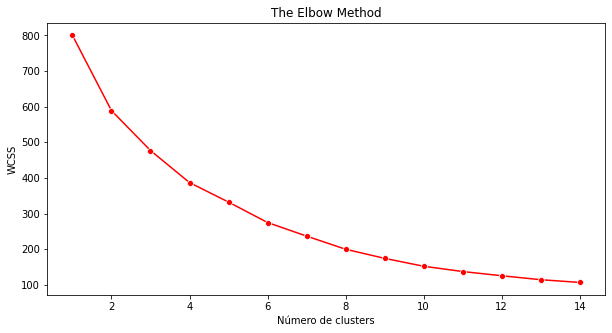

In [57]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 15), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [58]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 5, max_iter = 300)

In [59]:
kmeans2 = kmeans.fit(df2_esc)

In [60]:
# Coordenadas dos Centróides
centroides = kmeans2.cluster_centers_
centroides

array([[ 1.12815215,  1.22385356, -0.4498575 , -0.44231533],
       [-0.71852548, -0.46169904,  1.09030974,  1.17305816],
       [-0.88640526,  0.86299444, -0.43455895, -0.40762639],
       [-0.88640526, -0.92608124, -0.70017176,  0.28182355],
       [ 0.25517727,  0.0729628 ,  1.14279271, -1.32381522],
       [ 1.12815215, -0.77111419, -0.08465578,  0.8197479 ]])

In [61]:
# Inversão do escalonamento
escala.inverse_transform(kmeans2.cluster_centers_)

array([[1.00000000e+00, 5.59032258e+01, 4.87741935e+01, 3.88064516e+01],
       [8.33333333e-02, 3.24166667e+01, 8.91250000e+01, 8.04166667e+01],
       [5.55111512e-17, 5.08750000e+01, 4.91750000e+01, 3.97000000e+01],
       [1.66533454e-16, 2.59459459e+01, 4.22162162e+01, 5.74594595e+01],
       [5.66666667e-01, 3.98666667e+01, 9.05000000e+01, 1.61000000e+01],
       [1.00000000e+00, 2.81052632e+01, 5.83421053e+01, 7.13157895e+01]])

In [62]:
# Classificação dos dados
classificacao2 = kmeans2.labels_
classificacao2

array([5, 5, 3, 3, 3, 3, 2, 3, 0, 3, 0, 3, 2, 3, 0, 5, 3, 5, 0, 3, 0, 5,
       2, 5, 2, 5, 2, 5, 2, 3, 0, 3, 0, 5, 2, 3, 2, 3, 2, 3, 2, 5, 0, 3,
       2, 3, 2, 3, 3, 3, 2, 5, 3, 0, 2, 0, 2, 0, 3, 0, 0, 5, 2, 2, 0, 5,
       2, 2, 5, 3, 0, 2, 2, 2, 0, 5, 2, 0, 3, 2, 0, 5, 0, 2, 3, 0, 2, 3,
       3, 2, 2, 5, 0, 2, 3, 5, 2, 3, 0, 5, 3, 2, 0, 5, 0, 3, 2, 0, 0, 0,
       0, 3, 2, 5, 3, 3, 2, 2, 2, 2, 5, 2, 1, 5, 3, 1, 0, 5, 0, 5, 4, 5,
       3, 1, 4, 1, 4, 5, 4, 1, 2, 5, 3, 1, 4, 5, 0, 1, 4, 5, 4, 5, 4, 1,
       4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 5, 4, 5, 4, 5, 4, 1,
       4, 5, 4, 5, 4, 1, 4, 1, 4, 5, 4, 5, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [63]:
classificacao2[1]

5

In [64]:
agrupamento2 = pd.DataFrame(classificacao2, columns = ['Grupo'])
agrupamento2

Grupo
0        5
1        5
2        3
3        3
4        3
..     ...
195      1
196      4
197      1
198      4
199      1

[200 rows x 1 columns]

In [65]:
df4 = pd.concat([df, agrupamento2],axis=1)
df4

identificacao  genero  idade  rendimento  pontuacao  Grupo
0                1    Male     19          15         39      5
1                2    Male     21          15         81      5
2                3  Female     20          16          6      3
3                4  Female     23          16         77      3
4                5  Female     31          17         40      3
..             ...     ...    ...         ...        ...    ...
195            196  Female     35         120         79      1
196            197  Female     45         126         28      4
197            198    Male     32         126         74      1
198            199    Male     32         137         18      4
199            200    Male     30         137         83      1

[200 rows x 6 columns]

In [66]:
df4.iloc[125 , :]

identificacao       126
genero           Female
idade                31
rendimento           70
pontuacao            77
Grupo                 1
Name: 125, dtype: object

In [67]:
df4.loc[df4.identificacao == 76] 

identificacao genero  idade  rendimento  pontuacao  Grupo
75             76   Male     26          54         54      5

In [68]:
grupo0 = df4.loc[df4.Grupo == 0]
grupo0 

identificacao genero  idade  rendimento  pontuacao  Grupo
8                9   Male     64          19          3      0
10              11   Male     67          19         14      0
14              15   Male     37          20         13      0
18              19   Male     52          23         29      0
20              21   Male     35          24         35      0
30              31   Male     60          30          4      0
32              33   Male     53          33          4      0
42              43   Male     48          39         36      0
53              54   Male     59          43         60      0
55              56   Male     47          43         41      0
57              58   Male     69          44         46      0
59              60   Male     53          46         46      0
60              61   Male     70          46         56      0
64              65   Male     63          48         51      0
70              71   Male     70          49         55      0
74              75   Male     59          54         47      0
77              78   Male     40          54         48      0
80              81   Male     57          54         51      0
82              83   Male     67          54         41      0
85              86   Male     48          54         46      0
92              93   Male     48          60         49      0
98              99   Male     48          61         42      0
102            103   Male     67          62         59      0
104            105   Male     49          62         56      0
107            108   Male     54          63         46      0
108            109   Male     68          63         43      0
109            110   Male     66          63         48      0
110            111   Male     65          63         52      0
126            127   Male     43          71         35      0
128            129   Male     59          71         11      0
146            147   Male     48          77         36      0

In [69]:
grupo0.shape

(31, 6)

# **K-MEANS COM PCA**

In [70]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [71]:
df2_esc.shape

(200, 4)

**Componentes Principais**

In [72]:
from sklearn.decomposition import PCA

In [73]:
pca = PCA(n_components = 2)

In [74]:
df2_pca = pca.fit_transform(df2_esc)

In [75]:
df2_pca

array([[-4.06382715e-01, -5.20713635e-01],
       [-1.42767287e+00, -3.67310199e-01],
       [ 5.07605706e-02, -1.89406774e+00],
       [-1.69451310e+00, -1.63190805e+00],
       [-3.13108383e-01, -1.81048272e+00],
       [-1.71744627e+00, -1.59926418e+00],
       [ 7.90821124e-01, -1.94727112e+00],
       [-2.14832159e+00, -1.50537369e+00],
       [ 2.77428623e+00, -8.82987672e-01],
       [-1.21629477e+00, -1.61640464e+00],
       [ 2.62905084e+00, -8.61237043e-01],
       [-1.68947038e+00, -1.54542784e+00],
       [ 1.68582253e+00, -2.02394479e+00],
       [-1.64607339e+00, -1.52251259e+00],
       [ 1.17443628e+00, -6.12790961e-01],
       [-1.32613070e+00, -2.36719149e-01],
       [ 1.67728253e-02, -1.74344572e+00],
       [-1.07842454e+00, -2.44715641e-01],
       [ 1.48758780e+00, -5.72676028e-01],
       [-1.66373169e+00, -1.43259774e+00],
       [ 4.88090311e-01, -3.92921145e-01],
       [-1.01895051e+00, -1.66247511e-01],
       [ 1.35891492e+00, -1.82866936e+00],
       [-7.

In [76]:
# razão das variáveis explicativas
pca.explained_variance_ratio_

array([0.33690046, 0.26230645])

In [77]:
# Soma das variáveis explicativas
pca.explained_variance_ratio_.sum()

0.5992069019819846

**Elbow Method**

In [78]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df2_pca)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

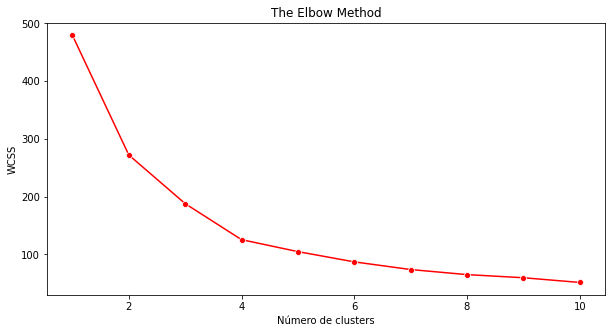

In [80]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [81]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)

In [82]:
kmeans3 = kmeans.fit(df2_pca)

In [83]:
# Coordenadas dos Centróides
centroides = kmeans3.cluster_centers_
centroides

array([[-1.15208536, -0.48631961],
       [ 0.80089898, -0.95285608],
       [ 1.12773395,  0.75231371],
       [-0.89664028,  1.25740369]])

In [84]:
# Classificação dos dados
classificacao3 = kmeans3.labels_
classificacao3

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 2, 2, 3, 1, 1, 2, 3,
       1, 1, 3, 0, 2, 1, 1, 1, 2, 3, 1, 2, 0, 1, 2, 2, 2, 1, 0, 2, 1, 0,
       0, 1, 1, 3, 2, 1, 0, 3, 1, 0, 2, 3, 0, 1, 2, 3, 2, 0, 1, 2, 2, 2,
       2, 0, 1, 3, 0, 0, 1, 1, 1, 1, 3, 1, 0, 3, 0, 0, 2, 3, 2, 3, 2, 3,
       0, 0, 2, 0, 1, 3, 2, 0, 1, 3, 0, 0, 2, 3, 2, 0, 1, 3, 2, 3, 1, 0,
       1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [85]:
classificacao3[2]

1

In [86]:
import plotly.express as px
import plotly.graph_objects as go

In [87]:
graf1 = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao3)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means com PCA')
graf3.update_xaxes(title = 'Componente 1')
graf3.update_yaxes(title = 'Componente 2')
graf3.show()

In [88]:
agrupamento3 = pd.DataFrame(classificacao3, columns = ['Grupo'])
agrupamento3

Grupo
0        0
1        0
2        1
3        0
4        1
..     ...
195      3
196      2
197      3
198      2
199      3

[200 rows x 1 columns]

In [89]:
df5 = pd.concat([df, agrupamento3],axis=1)
df5

identificacao  genero  idade  rendimento  pontuacao  Grupo
0                1    Male     19          15         39      0
1                2    Male     21          15         81      0
2                3  Female     20          16          6      1
3                4  Female     23          16         77      0
4                5  Female     31          17         40      1
..             ...     ...    ...         ...        ...    ...
195            196  Female     35         120         79      3
196            197  Female     45         126         28      2
197            198    Male     32         126         74      3
198            199    Male     32         137         18      2
199            200    Male     30         137         83      3

[200 rows x 6 columns]

In [90]:
df5.iloc[125 , :]

identificacao       126
genero           Female
idade                31
rendimento           70
pontuacao            77
Grupo                 0
Name: 125, dtype: object

In [91]:
df5.loc[df5.identificacao == 76] 

identificacao genero  idade  rendimento  pontuacao  Grupo
75             76   Male     26          54         54      3

In [92]:
grupo0 = df5.loc[df5.Grupo == 0]
grupo0 

identificacao  genero  idade  rendimento  pontuacao  Grupo
0                1    Male     19          15         39      0
1                2    Male     21          15         81      0
3                4  Female     23          16         77      0
5                6  Female     22          17         76      0
7                8  Female     23          18         94      0
..             ...     ...    ...         ...        ...    ...
161            162  Female     29          79         83      0
163            164  Female     31          81         93      0
165            166  Female     36          85         75      0
167            168  Female     33          86         95      0
175            176  Female     30          88         86      0

[61 rows x 6 columns]

In [93]:
grupo0.shape

(61, 6)

# **ALGORITMO HIERÁRQUICO COM PCA**

Agrupamento Hierárquico (Agglomerative Hierarchical Clustering)

Aplicado em problemas de aprendizagem não supervisionada.

Busca construir uma hierarquia de grupos, de forma aninhada, mesclando-os ou dividindo-os sucessivamente.

Esquematizada como forma de uma árvore e representada graficametne através de um dendrograma.

**Tipos diferentes de ligações**

* **Ligação única (single):** a distância entre dois clusters é a mínima distância entre observações de pares de clusters.
* **Ligação completa (complete):** a distância entre dois clusters é a máxima distância entre observações de pares de clusters.
* **Ligação média (average):** a distância clusters é a distância média entre cada ponto em um cluster para cada particular em outro.
* **Ward:** A distância entre clusters é a soma das diferenças quadradas em todos os clusters.



https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [94]:
df2.head()

genero  idade  rendimento  pontuacao
0       1     19          15         39
1       1     21          15         81
2       0     20          16          6
3       0     23          16         77
4       0     31          17         40

In [95]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [96]:
df2_esc.shape

(200, 4)

**Componentes Principais**

In [97]:
from sklearn.decomposition import PCA

In [98]:
pca = PCA(n_components = 2)

In [99]:
df2_pca = pca.fit_transform(df2_esc)

In [100]:
df2_pca

array([[-4.06382715e-01, -5.20713635e-01],
       [-1.42767287e+00, -3.67310199e-01],
       [ 5.07605706e-02, -1.89406774e+00],
       [-1.69451310e+00, -1.63190805e+00],
       [-3.13108383e-01, -1.81048272e+00],
       [-1.71744627e+00, -1.59926418e+00],
       [ 7.90821124e-01, -1.94727112e+00],
       [-2.14832159e+00, -1.50537369e+00],
       [ 2.77428623e+00, -8.82987672e-01],
       [-1.21629477e+00, -1.61640464e+00],
       [ 2.62905084e+00, -8.61237043e-01],
       [-1.68947038e+00, -1.54542784e+00],
       [ 1.68582253e+00, -2.02394479e+00],
       [-1.64607339e+00, -1.52251259e+00],
       [ 1.17443628e+00, -6.12790961e-01],
       [-1.32613070e+00, -2.36719149e-01],
       [ 1.67728253e-02, -1.74344572e+00],
       [-1.07842454e+00, -2.44715641e-01],
       [ 1.48758780e+00, -5.72676028e-01],
       [-1.66373169e+00, -1.43259774e+00],
       [ 4.88090311e-01, -3.92921145e-01],
       [-1.01895051e+00, -1.66247511e-01],
       [ 1.35891492e+00, -1.82866936e+00],
       [-7.

**Dendograma**

In [101]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

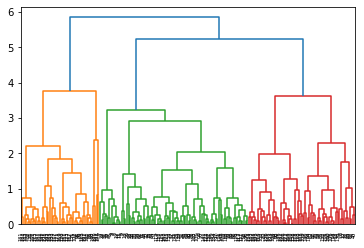

In [102]:
dendrograma = dendrogram(linkage(df2_pca, method = 'complete'))

In [103]:
from sklearn.cluster import AgglomerativeClustering

In [104]:
hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'complete')
classificacao4 = hier.fit_predict(df2_pca)

In [105]:
classificacao4

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0,
       2, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 1, 0, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0, 1, 0, 1, 0,
       2, 2, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2,
       1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0,
       0, 0])

In [106]:
import plotly.express as px

In [107]:
graf = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao4)
graf.update_layout(width=800,height=500,title_text='Agrupamento Hierárquico')
graf.show()

**Agrupamento**

In [108]:
agrupamento4 = pd.DataFrame(classificacao4, columns = ['Grupo'])
agrupamento4

Grupo
0        2
1        2
2        2
3        2
4        2
..     ...
195      0
196      1
197      0
198      0
199      0

[200 rows x 1 columns]

In [109]:
df6 = pd.concat([df, agrupamento4],axis=1)
df6

identificacao  genero  idade  rendimento  pontuacao  Grupo
0                1    Male     19          15         39      2
1                2    Male     21          15         81      2
2                3  Female     20          16          6      2
3                4  Female     23          16         77      2
4                5  Female     31          17         40      2
..             ...     ...    ...         ...        ...    ...
195            196  Female     35         120         79      0
196            197  Female     45         126         28      1
197            198    Male     32         126         74      0
198            199    Male     32         137         18      0
199            200    Male     30         137         83      0

[200 rows x 6 columns]

In [110]:
df6.loc[df6.identificacao == 22] 

identificacao genero  idade  rendimento  pontuacao  Grupo
21             22   Male     25          24         73      2

In [111]:
grupo2 = df6.loc[df6.Grupo == 2]
grupo2 

identificacao  genero  idade  rendimento  pontuacao  Grupo
0                1    Male     19          15         39      2
1                2    Male     21          15         81      2
2                3  Female     20          16          6      2
3                4  Female     23          16         77      2
4                5  Female     31          17         40      2
..             ...     ...    ...         ...        ...    ...
159            160  Female     30          78         73      2
168            169  Female     36          87         27      2
180            181  Female     37          97         32      2
184            185  Female     41          99         39      2
190            191  Female     34         103         23      2

[89 rows x 6 columns]

# **ALGORITMO HIERÁRQUICO: TODOS ATRIBUTOS**






In [112]:
df2.head()

genero  idade  rendimento  pontuacao
0       1     19          15         39
1       1     21          15         81
2       0     20          16          6
3       0     23          16         77
4       0     31          17         40

In [113]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [114]:
df2_esc.shape

(200, 4)

**Dendograma**

In [115]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

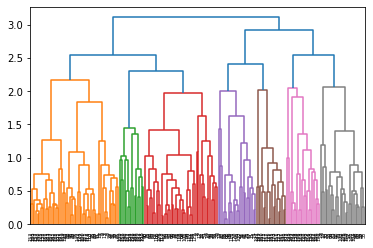

In [116]:
dendrograma = dendrogram(linkage(df2_esc, method = 'average'))

In [117]:
from sklearn.cluster import AgglomerativeClustering

In [118]:
hier = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage = 'average')
classificacao5 = hier.fit_predict(df2_esc)

In [119]:
classificacao5

array([5, 5, 4, 0, 4, 0, 4, 0, 1, 0, 1, 0, 4, 0, 5, 5, 4, 5, 1, 0, 5, 5,
       4, 5, 4, 5, 4, 5, 4, 0, 1, 0, 1, 5, 4, 0, 4, 0, 4, 0, 4, 5, 1, 0,
       4, 0, 4, 0, 0, 0, 4, 5, 0, 1, 4, 1, 4, 1, 0, 1, 1, 5, 4, 4, 1, 5,
       4, 4, 5, 0, 1, 4, 4, 4, 1, 5, 4, 1, 0, 4, 1, 1, 1, 4, 0, 1, 4, 0,
       4, 4, 4, 5, 1, 4, 4, 5, 4, 0, 1, 5, 0, 4, 1, 5, 1, 0, 4, 1, 1, 1,
       1, 0, 4, 5, 0, 0, 4, 4, 4, 4, 5, 4, 4, 2, 0, 0, 3, 2, 3, 2, 3, 2,
       0, 0, 3, 0, 6, 2, 3, 0, 6, 2, 0, 0, 3, 2, 3, 0, 6, 2, 3, 2, 6, 0,
       6, 0, 3, 0, 3, 0, 6, 0, 3, 0, 3, 0, 3, 0, 6, 2, 3, 2, 3, 2, 6, 0,
       3, 2, 3, 2, 6, 0, 3, 0, 6, 2, 6, 2, 6, 0, 6, 0, 3, 0, 6, 0, 6, 2,
       3, 2])

**Agrupamento**

In [120]:
agrupamento5 = pd.DataFrame(classificacao5, columns = ['Grupo'])
agrupamento5

Grupo
0        5
1        5
2        4
3        0
4        4
..     ...
195      0
196      6
197      2
198      3
199      2

[200 rows x 1 columns]

In [121]:
df7 = pd.concat([df, agrupamento5],axis=1)
df7

identificacao  genero  idade  rendimento  pontuacao  Grupo
0                1    Male     19          15         39      5
1                2    Male     21          15         81      5
2                3  Female     20          16          6      4
3                4  Female     23          16         77      0
4                5  Female     31          17         40      4
..             ...     ...    ...         ...        ...    ...
195            196  Female     35         120         79      0
196            197  Female     45         126         28      6
197            198    Male     32         126         74      2
198            199    Male     32         137         18      3
199            200    Male     30         137         83      2

[200 rows x 6 columns]

In [122]:
df7.loc[df7.identificacao == 131]

identificacao genero  idade  rendimento  pontuacao  Grupo
130            131   Male     47          71          9      3

In [123]:
grupo4 = df7.loc[df7.Grupo == 6]
grupo4.head(2)

identificacao  genero  idade  rendimento  pontuacao  Grupo
136            137  Female     44          73          7      6
140            141  Female     57          75          5      6

In [124]:
grupo4.shape

(15, 6)

# **ALGORITMO DBSCAN COM PCA**

DBSCAN(Density-based Spatial Clustering of Applications with Noise)

Agrupamento Espacial de Aplicações com Ruído Baseado em Densidade.


Mais rápido que o Kmeans e o hierárquico.
Trabalha muito bem com outliers.
Bom para dados que contêm clusters de densidade semelhante.
Encontra amostras centrais de alta densidade e expande clusters a partir delas.

**Requer dois parâmetros:***
(eps): raio de alcance.
min_samples: quantidade mínima de pontos necessários para formar um cluster.

Começa com um ponto de partida aleatório.

Se a vizinhaça (eps) desse ponto contiver pontos suficientes, um cluster é iniciado. caso contrário, o ponto é rotulado como ruído.

**Vantagens**

* Não exige especificação do número de clusters.
* Pode encontrar clusters de formato arbitrário.
* É robusto a outliers.
* Requer apenas dois parâmetros.
* Mais rápido.

**Desvantagens**
* Pode não agrupar bem conjuntos de dados com grandes diferenças de densidades.
* Pode ser difícil escolher um limite de distância (eps) adequado.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html 

In [125]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [126]:
df2_esc.shape

(200, 4)

**Componentes Principais**

In [127]:
from sklearn.decomposition import PCA

In [128]:
pca = PCA(n_components = 2)

In [129]:
df2_pca = pca.fit_transform(df2_esc)

In [130]:
df2_pca

array([[-4.06382715e-01, -5.20713635e-01],
       [-1.42767287e+00, -3.67310199e-01],
       [ 5.07605706e-02, -1.89406774e+00],
       [-1.69451310e+00, -1.63190805e+00],
       [-3.13108383e-01, -1.81048272e+00],
       [-1.71744627e+00, -1.59926418e+00],
       [ 7.90821124e-01, -1.94727112e+00],
       [-2.14832159e+00, -1.50537369e+00],
       [ 2.77428623e+00, -8.82987672e-01],
       [-1.21629477e+00, -1.61640464e+00],
       [ 2.62905084e+00, -8.61237043e-01],
       [-1.68947038e+00, -1.54542784e+00],
       [ 1.68582253e+00, -2.02394479e+00],
       [-1.64607339e+00, -1.52251259e+00],
       [ 1.17443628e+00, -6.12790961e-01],
       [-1.32613070e+00, -2.36719149e-01],
       [ 1.67728253e-02, -1.74344572e+00],
       [-1.07842454e+00, -2.44715641e-01],
       [ 1.48758780e+00, -5.72676028e-01],
       [-1.66373169e+00, -1.43259774e+00],
       [ 4.88090311e-01, -3.92921145e-01],
       [-1.01895051e+00, -1.66247511e-01],
       [ 1.35891492e+00, -1.82866936e+00],
       [-7.

In [131]:
from sklearn.cluster import DBSCAN

In [132]:
dbscan = DBSCAN(eps = 0.32, min_samples=4)
dbscan.fit(df2_pca)

DBSCAN(eps=0.32, min_samples=4)

In [133]:
classificacao6 = dbscan.labels_
classificacao6

array([ 0,  0, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  3,  1,  2,  0, -1,
        0,  2,  1,  0,  0,  3,  0,  3,  0, -1,  0,  0,  1, -1,  1, -1,  0,
        3,  1, -1, -1,  0,  1,  3,  0,  2,  4,  5, -1,  0,  4,  4,  4,  0,
       -1,  4,  2,  0,  2,  0,  2,  4,  2,  2,  0,  5,  0,  2,  0,  0,  5,
        0,  4,  2,  0,  0,  0,  2,  0,  0,  2,  0,  0,  2,  2,  2,  0,  0,
        2,  0,  0,  0,  0,  2,  0,  2,  0,  0,  0,  0,  0,  2,  0,  0,  0,
        2,  0,  2,  0,  2,  2,  2,  2,  2,  0,  0,  0,  0,  0,  2,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  2,  0, -1,  0,  2,  0,  0,  0,  6,  0,
        2,  0,  6,  0, -1,  0,  0,  0,  6, -1,  2,  0, -1,  0,  2,  0,  2,
        0,  2,  0,  2,  0,  2,  0,  2,  0,  6,  0,  2,  0,  2,  0,  2, -1,
        2,  0,  2,  0,  2,  0, -1,  0, -1,  0,  2,  0, -1,  0,  2, -1,  2,
        0,  2,  0,  2,  0, -1,  0,  2,  0,  6, -1, -1, -1])

In [134]:
import plotly.express as px

In [135]:
graf = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao6)
graf.update_layout(width=800,height=500,title_text='Agrupamento DBSCAN')
graf.show()

**Agrupamento**

In [136]:
agrupamento6 = pd.DataFrame(classificacao6, columns = ['Grupo'])
agrupamento6

Grupo
0        0
1        0
2       -1
3        1
4       -1
..     ...
195      0
196      6
197     -1
198     -1
199     -1

[200 rows x 1 columns]

In [137]:
df8 = pd.concat([df, agrupamento6],axis=1)
df8

identificacao  genero  idade  rendimento  pontuacao  Grupo
0                1    Male     19          15         39      0
1                2    Male     21          15         81      0
2                3  Female     20          16          6     -1
3                4  Female     23          16         77      1
4                5  Female     31          17         40     -1
..             ...     ...    ...         ...        ...    ...
195            196  Female     35         120         79      0
196            197  Female     45         126         28      6
197            198    Male     32         126         74     -1
198            199    Male     32         137         18     -1
199            200    Male     30         137         83     -1

[200 rows x 6 columns]

In [138]:
df8.loc[df8.identificacao == 5] 

identificacao  genero  idade  rendimento  pontuacao  Grupo
4              5  Female     31          17         40     -1

In [139]:
ruido = df8.loc[df8.Grupo == -1]
ruido 

identificacao  genero  idade  rendimento  pontuacao  Grupo
2                3  Female     20          16          6     -1
4                5  Female     31          17         40     -1
6                7  Female     35          18          6     -1
7                8  Female     23          18         94     -1
8                9    Male     64          19          3     -1
9               10  Female     30          19         72     -1
10              11    Male     67          19         14     -1
16              17  Female     35          21         35     -1
26              27  Female     45          28         32     -1
30              31    Male     60          30          4     -1
32              33    Male     53          33          4     -1
36              37  Female     42          34         17     -1
37              38  Female     30          34         73     -1
45              46  Female     24          39         65     -1
51              52    Male     33          42         60     -1
128            129    Male     59          71         11     -1
140            141  Female     57          75          5     -1
145            146    Male     28          77         97     -1
148            149  Female     34          78         22     -1
169            170    Male     32          87         63     -1
176            177    Male     58          88         15     -1
178            179    Male     59          93         14     -1
182            183    Male     46          98         15     -1
185            186    Male     30          99         97     -1
192            193    Male     33         113          8     -1
197            198    Male     32         126         74     -1
198            199    Male     32         137         18     -1
199            200    Male     30         137         83     -1

In [140]:
ruido.shape

(28, 6)

# **ALGORITMO DBSCAN: TODOS ATRIBUTOS**

In [141]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [142]:
df2_esc.shape

(200, 4)

In [143]:
from sklearn.cluster import DBSCAN

In [208]:
dbscan = DBSCAN(eps = 0.78, min_samples=4)
dbscan.fit(df2_esc)

DBSCAN(eps=0.78, min_samples=4)

In [209]:
classificacao7 = dbscan.labels_
classificacao7

array([-1,  0, -1,  1,  1,  1, -1,  1,  2,  1,  2, -1,  1,  1, -1,  0,  1,
        0,  3, -1, -1,  0,  1,  0,  1,  0,  1,  0,  1,  1,  2,  1,  2,  0,
        1,  1,  1,  1,  1,  1,  1,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1,
        4,  1,  3,  1,  3,  1,  3,  1,  3,  3,  4,  1,  1,  3,  4,  1,  1,
        4,  1,  3,  1,  1,  1,  3,  4,  1,  3,  1,  1,  3,  3,  3,  1,  1,
        3,  1,  1,  1,  1,  1,  4,  3,  1,  1,  4,  1,  1,  3,  4,  1,  1,
        3,  4,  3,  1,  1,  3,  3,  3,  3,  1,  1,  4,  1,  1,  1,  1,  1,
        1,  4,  1,  1,  5,  1,  1,  3,  5,  3,  5,  3,  5,  1,  1,  3,  1,
        6,  5,  3,  1,  6,  5,  1,  1,  3,  5,  3,  1,  6,  5,  3,  5,  6,
        1,  6,  1,  3,  1,  3,  1,  1,  1,  3,  1,  3,  1,  3,  1,  6,  5,
        3,  5,  3,  5,  6,  1,  3,  5,  3,  5,  6,  1,  3,  1,  6,  5,  6,
        5,  6,  1,  6,  1, -1,  1,  6,  1, -1, -1, -1, -1])

**Agrupamento**

In [210]:
agrupamento7 = pd.DataFrame(classificacao7, columns = ['Grupo'])
agrupamento7

Grupo
0       -1
1        0
2       -1
3        1
4        1
..     ...
195      1
196     -1
197     -1
198     -1
199     -1

[200 rows x 1 columns]

In [211]:
df9 = pd.concat([df, agrupamento7],axis=1)
df9

identificacao  genero  idade  rendimento  pontuacao  Grupo
0                1    Male     19          15         39     -1
1                2    Male     21          15         81      0
2                3  Female     20          16          6     -1
3                4  Female     23          16         77      1
4                5  Female     31          17         40      1
..             ...     ...    ...         ...        ...    ...
195            196  Female     35         120         79      1
196            197  Female     45         126         28     -1
197            198    Male     32         126         74     -1
198            199    Male     32         137         18     -1
199            200    Male     30         137         83     -1

[200 rows x 6 columns]

In [212]:
df9.loc[df9.identificacao == 127] 

identificacao genero  idade  rendimento  pontuacao  Grupo
126            127   Male     43          71         35      3

In [213]:
ruido = df9.loc[df9.Grupo == -1]
ruido 

identificacao  genero  idade  rendimento  pontuacao  Grupo
0                1    Male     19          15         39     -1
2                3  Female     20          16          6     -1
6                7  Female     35          18          6     -1
11              12  Female     35          19         99     -1
14              15    Male     37          20         13     -1
19              20  Female     35          23         98     -1
20              21    Male     35          24         35     -1
192            193    Male     33         113          8     -1
196            197  Female     45         126         28     -1
197            198    Male     32         126         74     -1
198            199    Male     32         137         18     -1
199            200    Male     30         137         83     -1

In [214]:
ruido.shape

(12, 6)

In [215]:
grupo = df9.loc[df9.Grupo == 1]
grupo.shape

(94, 6)

# **ALGORITMO MEANSHIFT COM PCA**

**MeanShift (Deslocamento médio)**

* Agrupamento para problemas de aprendizagem não supervisionada.
* Atribui os pontos aos clusters de forma interativa.
* Não necessita indicar o número de clusters.
* Busca região de maior densidade.
* Aplicado em processamento de imagens e visão computacional.

**Vantagens**

* Encontra um número variável de regiões densas.
* Robusto para outliers.
* Não assume nenhuma forma (esférica, elíptica, quadrada...) nos clusters de dados.
* Utiliza apenas um único parâmetro (bandwich - largura da banda ou janela).

**Desvantagens**

* A saída depende do tamanho da janela (largura da banda).
* A seleção do tamanho da janela não é trivial.
* Computacionalmente caro.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html

In [216]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [217]:
df2_esc.shape

(200, 4)

**Componentes Principais**

In [218]:
from sklearn.decomposition import PCA

In [219]:
pca = PCA(n_components = 2)

In [220]:
df2_pca = pca.fit_transform(df2_esc)

In [221]:
df2_pca

array([[-4.06382715e-01, -5.20713635e-01],
       [-1.42767287e+00, -3.67310199e-01],
       [ 5.07605706e-02, -1.89406774e+00],
       [-1.69451310e+00, -1.63190805e+00],
       [-3.13108383e-01, -1.81048272e+00],
       [-1.71744627e+00, -1.59926418e+00],
       [ 7.90821124e-01, -1.94727112e+00],
       [-2.14832159e+00, -1.50537369e+00],
       [ 2.77428623e+00, -8.82987672e-01],
       [-1.21629477e+00, -1.61640464e+00],
       [ 2.62905084e+00, -8.61237043e-01],
       [-1.68947038e+00, -1.54542784e+00],
       [ 1.68582253e+00, -2.02394479e+00],
       [-1.64607339e+00, -1.52251259e+00],
       [ 1.17443628e+00, -6.12790961e-01],
       [-1.32613070e+00, -2.36719149e-01],
       [ 1.67728253e-02, -1.74344572e+00],
       [-1.07842454e+00, -2.44715641e-01],
       [ 1.48758780e+00, -5.72676028e-01],
       [-1.66373169e+00, -1.43259774e+00],
       [ 4.88090311e-01, -3.92921145e-01],
       [-1.01895051e+00, -1.66247511e-01],
       [ 1.35891492e+00, -1.82866936e+00],
       [-7.

**MeanShift**

In [222]:
from sklearn.cluster import MeanShift

In [223]:
mean = MeanShift(bandwidth=1, cluster_all=True)

In [224]:
mean.fit(df2_pca)

MeanShift(bandwidth=1)

In [225]:
classificacao8 = mean.labels_
classificacao8

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 1, 1, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1,
       0, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 2, 0, 2, 3, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 3, 3,
       3, 2])

In [226]:
import plotly.express as px

In [227]:
graf = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao8)
graf.update_layout(width=800,height=500,title_text='Agrupamento MeanShift')
graf.show()

**Agrupamento**

In [228]:
agrupamento8 = pd.DataFrame(classificacao8, columns = ['Grupo'])
agrupamento8

Grupo
0        1
1        1
2        0
3        1
4        1
..     ...
195      2
196      3
197      3
198      3
199      2

[200 rows x 1 columns]

In [229]:
df9 = pd.concat([df, agrupamento8],axis=1)
df9

identificacao  genero  idade  rendimento  pontuacao  Grupo
0                1    Male     19          15         39      1
1                2    Male     21          15         81      1
2                3  Female     20          16          6      0
3                4  Female     23          16         77      1
4                5  Female     31          17         40      1
..             ...     ...    ...         ...        ...    ...
195            196  Female     35         120         79      2
196            197  Female     45         126         28      3
197            198    Male     32         126         74      3
198            199    Male     32         137         18      3
199            200    Male     30         137         83      2

[200 rows x 6 columns]

In [230]:
df9.loc[df9.identificacao == 19] 

identificacao genero  idade  rendimento  pontuacao  Grupo
18             19   Male     52          23         29      0

In [231]:
ruido = df9.loc[df9.Grupo == -1]
ruido 

Empty DataFrame
Columns: [identificacao, genero, idade, rendimento, pontuacao, Grupo]
Index: []

In [237]:
grupo = df9.loc[df9.Grupo == 3]
grupo.shape

(16, 6)

# **ALGORITMO MEANSHIFT: TODOS ATRIBUTOS**

In [238]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [239]:
df2

genero  idade  rendimento  pontuacao
0         1     19          15         39
1         1     21          15         81
2         0     20          16          6
3         0     23          16         77
4         0     31          17         40
..      ...    ...         ...        ...
195       0     35         120         79
196       0     45         126         28
197       1     32         126         74
198       1     32         137         18
199       1     30         137         83

[200 rows x 4 columns]

In [240]:
df2_esc.shape

(200, 4)

In [241]:
from sklearn.cluster import MeanShift

In [242]:
mean = MeanShift(bandwidth=1.5, cluster_all=True)

In [243]:
mean.fit(df2_esc)

MeanShift(bandwidth=1.5)

In [244]:
classificacao9 = mean.labels_
classificacao9

array([1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 1, 2, 0, 2, 1,
       0, 2, 1, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0,
       0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2,
       2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 3, 4, 1, 2, 1, 4, 1,
       0, 3, 4, 3, 0, 1, 4, 3, 0, 1, 0, 3, 4, 1, 2, 3, 0, 1, 4, 1, 0, 3,
       0, 3, 4, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4, 3, 0, 1, 4, 1, 4, 1, 0, 3,
       4, 1, 4, 1, 0, 3, 4, 3, 0, 1, 0, 1, 4, 3, 0, 3, 4, 3, 4, 3, 4, 1,
       4, 1])

**Agrupamento**

In [245]:
agrupamento9 = pd.DataFrame(classificacao9, columns = ['Grupo'])
agrupamento9

Grupo
0        1
1        1
2        0
3        0
4        0
..     ...
195      3
196      4
197      1
198      4
199      1

[200 rows x 1 columns]

In [246]:
df10 = pd.concat([df, agrupamento9],axis=1)
df10

identificacao  genero  idade  rendimento  pontuacao  Grupo
0                1    Male     19          15         39      1
1                2    Male     21          15         81      1
2                3  Female     20          16          6      0
3                4  Female     23          16         77      0
4                5  Female     31          17         40      0
..             ...     ...    ...         ...        ...    ...
195            196  Female     35         120         79      3
196            197  Female     45         126         28      4
197            198    Male     32         126         74      1
198            199    Male     32         137         18      4
199            200    Male     30         137         83      1

[200 rows x 6 columns]

In [247]:
df10.loc[df10.identificacao == 45] 

identificacao  genero  idade  rendimento  pontuacao  Grupo
44             45  Female     49          39         28      0

In [248]:
grupo = df10.loc[df10.Grupo == 4]
grupo.shape

(21, 6)

# **K-PROTOTYPES**

Algoritmo para agrupamento de dados mistos (categóricos e numéricos). Documentação: https://pypi.org/project/kmodes/

---



In [249]:
df.head()

identificacao  genero  idade  rendimento  pontuacao
0              1    Male     19          15         39
1              2    Male     21          15         81
2              3  Female     20          16          6
3              4  Female     23          16         77
4              5  Female     31          17         40

In [250]:
dados= df[['genero','idade','rendimento', 'pontuacao']]
dados

genero  idade  rendimento  pontuacao
0      Male     19          15         39
1      Male     21          15         81
2    Female     20          16          6
3    Female     23          16         77
4    Female     31          17         40
..      ...    ...         ...        ...
195  Female     35         120         79
196  Female     45         126         28
197    Male     32         126         74
198    Male     32         137         18
199    Male     30         137         83

[200 rows x 4 columns]

In [251]:
pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [252]:
from kmodes.kprototypes import KPrototypes

In [253]:
kproto = KPrototypes(n_clusters= 4)

In [254]:
kproto1 = kproto.fit_predict(dados, categorical=[0])

In [255]:
kproto1

array([2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=uint16)

In [256]:
kproto1[4]

0

In [257]:
agrupamento = pd.DataFrame(kproto1, columns = ['grupo'])
agrupamento

grupo
0        2
1        2
2        0
3        2
4        0
..     ...
195      1
196      3
197      1
198      3
199      1

[200 rows x 1 columns]

In [258]:
df_final = pd.concat([df, agrupamento],axis=1)

In [259]:
df_final.head()

identificacao  genero  idade  rendimento  pontuacao  grupo
0              1    Male     19          15         39      2
1              2    Male     21          15         81      2
2              3  Female     20          16          6      0
3              4  Female     23          16         77      2
4              5  Female     31          17         40      0

In [260]:
df_final.iloc[132 , :]

identificacao       133
genero           Female
idade                25
rendimento           72
pontuacao            34
grupo                 3
Name: 132, dtype: object

In [261]:
grupo = df_final.loc[df_final.grupo ==3]
grupo.head()

identificacao  genero  idade  rendimento  pontuacao  grupo
124            125  Female     23          70         29      3
126            127    Male     43          71         35      3
128            129    Male     59          71         11      3
130            131    Male     47          71          9      3
132            133  Female     25          72         34      3

In [262]:
grupo.shape

(38, 6)

In [278]:
grupo2 = df_final.loc[df_final.grupo ==1]
grupo2.shape

(39, 6)

# **K-MODES**

Algoritmo para agrupamento de dados categóricos. Documentação: https://pypi.org/project/kmodes/

https://www.kaggle.com/datasets/yukeshmarudhasalam/bankmarketing 

In [318]:
import numpy as np
import pandas as pd

In [319]:
import warnings
warnings.filterwarnings("ignore")

In [320]:
df = pd.read_csv('/content/bankmarketing.csv')

In [321]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [322]:
df.shape

(41188, 21)

In [323]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [324]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

**Variáveis**

**age** : idade (numérica)

**job** : tipo de trabalho (categorias: 'admin.','blue-collar','entrepreneur(empreendedor)','housemaid','management (gestão)','retired (aposentado)','self-employed (autônomo)','services','student','technician','unemployed (desempregado)','unknown')

**marital** : estado civil (categorias: 'divorced','married','single','unknown'; obs.: 'divorced' significa divorciado ou viúvo (a))

**education**: nível escolar (categorias: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

**default**: inadimplência (categorias: 'no','yes','unknown')

**housing**: crédito de habitação (categorias: 'no','yes','unknown')

**loan**: empréstimo pessoal (categorias: 'no','yes','unknown')

**contact**: contato (categorias: 'cellular','telephone')

**month**: último mês de contato (categorias: 'jan', 'feb', 'mar', 'april', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec')

**day_of_week**: último dia de contato (categorical: 'mon','tue','wed','thu','fri')

**poutcome:** resultado do marketing anterior (categorical: 'failure','nonexistent','success')

In [325]:
df2 = df[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]
df2

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week     poutcome  
0      telephone   may         mon  nonexistent  
1      telephone   may         mon  nonexistent  
2      telephone   may         mon  nonexistent  
3      telephone   may         mon  nonexistent  
4      telephone   may         mon  nonexistent  
...          ...   ...         ...          ...  
41183   cellular   nov         fri  nonexistent  
41184   cellular   nov         fri  nonexistent  
41185   cellular   nov         fri  nonexistent  
41186   cellular   nov         fri  nonexistent  
41187   cellular   nov         fri      failure  

[41188 rows x 11 columns]

In [326]:
df3 = df2.copy()

In [327]:
df3['faixa_idade'] = pd.cut(df3['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])

In [328]:
df3  = df3.drop('age',axis = 1)

In [329]:
df3.head(30)

job   marital            education  default  housing     loan  \
0       housemaid   married             basic.4y       no       no       no   
1        services   married          high.school  unknown       no       no   
2        services   married          high.school       no      yes       no   
3          admin.   married             basic.6y       no       no       no   
4        services   married          high.school       no       no      yes   
5        services   married             basic.9y  unknown       no       no   
6          admin.   married  professional.course       no       no       no   
7     blue-collar   married              unknown  unknown       no       no   
8      technician    single  professional.course       no      yes       no   
9        services    single          high.school       no      yes       no   
10    blue-collar   married              unknown  unknown       no       no   
11       services    single          high.school       no      yes       no   
12    blue-collar    single          high.school       no       no      yes   
13      housemaid  divorced             basic.4y       no      yes       no   
14    blue-collar   married             basic.6y       no      yes       no   
15        retired   married             basic.9y  unknown      yes      yes   
16    blue-collar   married             basic.6y       no      yes       no   
17    blue-collar   married             basic.6y  unknown      yes      yes   
18    blue-collar   married             basic.9y       no      yes      yes   
19     management    single             basic.9y  unknown       no       no   
20     unemployed   married          high.school       no       no       no   
21    blue-collar   married             basic.4y  unknown      yes       no   
22        retired    single          high.school       no      yes       no   
23     technician    single          high.school       no      yes       no   
24         admin.   married          high.school       no      yes       no   
25     technician   married    university.degree       no       no      yes   
26     technician   married              unknown       no      yes       no   
27  self-employed   married             basic.9y  unknown       no       no   
28     technician    single    university.degree  unknown       no       no   
29        unknown   married    university.degree  unknown  unknown  unknown   

      contact month day_of_week     poutcome faixa_idade  
0   telephone   may         mon  nonexistent       50-60  
1   telephone   may         mon  nonexistent       50-60  
2   telephone   may         mon  nonexistent       30-40  
3   telephone   may         mon  nonexistent       30-40  
4   telephone   may         mon  nonexistent       50-60  
5   telephone   may         mon  nonexistent       40-50  
6   telephone   may         mon  nonexistent       50-60  
7   telephone   may         mon  nonexistent       40-50  
8   telephone   may         mon  nonexistent       20-30  
9   telephone   may         mon  nonexistent       20-30  
10  telephone   may         mon  nonexistent       40-50  
11  telephone   may         mon  nonexistent       20-30  
12  telephone   may         mon  nonexistent       20-30  
13  telephone   may         mon  nonexistent       50-60  
14  telephone   may         mon  nonexistent       30-40  
15  telephone   may         mon  nonexistent       50-60  
16  telephone   may         mon  nonexistent       30-40  
17  telephone   may         mon  nonexistent       40-50  
18  telephone   may         mon  nonexistent       40-50  
19  telephone   may         mon  nonexistent       30-40  
20  telephone   may         mon  nonexistent       20-30  
21  telephone   may         mon  nonexistent       50-60  
22  telephone   may         mon  nonexistent       50-60  
23  telephone   may         mon  nonexistent       40-50  
24  telephone   may         mon  nonexistent       30-40  
25  telephone   may         mo

In [330]:
df3.dtypes

job              object
marital          object
education        object
default          object
housing          object
loan             object
contact          object
month            object
day_of_week      object
poutcome         object
faixa_idade    category
dtype: object

In [331]:
df3.isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
faixa_idade    0
dtype: int64

### **Pré-processamento**

**Transformação para codificação numérica**

In [332]:
from sklearn import preprocessing
df4 = df3.apply(preprocessing.LabelEncoder().fit_transform)
df4.head()

job  marital  education  default  housing  loan  contact  month  \
0    3        1          0        0        0     0        1      6   
1    7        1          3        1        0     0        1      6   
2    7        1          3        0        2     0        1      6   
3    0        1          1        0        0     0        1      6   
4    7        1          3        0        0     2        1      6   

   day_of_week  poutcome  faixa_idade  
0            1         1            4  
1            1         1            4  
2            1         1            2  
3            1         1            2  
4            1         1            4

### **Instalação**

In [333]:
pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [334]:
from kmodes.kmodes import KModes

In [335]:
?KModes

### **NÚMERO DE CLUSTERS "IDEAL"**

In [336]:
custo = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, n_init = 2, verbose=1)
    kmode.fit_predict(df4)
    custo.append(kmode.cost_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 216952.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4993, cost: 185138.0
Run 1, iteration: 2/100, moves: 1368, cost: 185138.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6186, cost: 179774.0
Run 1, iteration: 2/100, moves: 1395, cost: 179774.0
Initiali

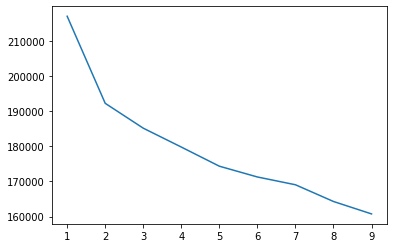

In [337]:
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,10,1)])
plt.plot(y,custo);

In [338]:
kmd = KModes(n_clusters=4, verbose=1)
kmd1 = kmd.fit_predict(df4)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6186, cost: 179774.0
Run 1, iteration: 2/100, moves: 1395, cost: 179774.0


In [339]:
kmd1

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [340]:
kmd1[40000]

2

In [341]:
agrupamento = pd.DataFrame(kmd1, columns = ['grupo'])
agrupamento

grupo
0          1
1          1
2          0
3          0
4          1
...      ...
41183      0
41184      1
41185      0
41186      1
41187      0

[41188 rows x 1 columns]

In [342]:
df5 = pd.concat([df2, agrupamento],axis=1)

In [343]:
df5.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week     poutcome  grupo  
0   may         mon  nonexistent      1  
1   may         mon  nonexistent      1  
2   may         mon  nonexistent      0  
3   may         mon  nonexistent      0  
4   may         mon  nonexistent      1

In [344]:
df5.iloc[33284 , :]

age                             38
job                     technician
marital                    married
education      professional.course
default                         no
housing                         no
loan                            no
contact                   cellular
month                          may
day_of_week                    tue
poutcome               nonexistent
grupo                            0
Name: 33284, dtype: object

In [345]:
grupo = df5.loc[df5.grupo == 3]
grupo.head()

age         job   marital            education  default housing loan  \
8    24  technician    single  professional.course       no     yes   no   
13   57   housemaid  divorced             basic.4y       no     yes   no   
28   54  technician    single    university.degree  unknown      no   no   
53   53      admin.    single  professional.course       no      no   no   
55   55  technician   married  professional.course  unknown     yes   no   

      contact month day_of_week     poutcome  grupo  
8   telephone   may         mon  nonexistent      3  
13  telephone   may         mon  nonexistent      3  
28  telephone   may         mon  nonexistent      3  
53  telephone   may         mon  nonexistent      3  
55  telephone   may         mon  nonexistent      3

In [346]:
grupo.shape

(3570, 12)

In [347]:
import matplotlib.pyplot as plt
import seaborn as sns

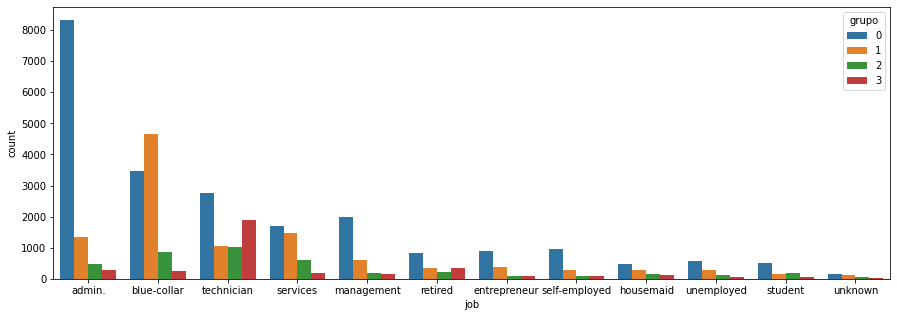

In [348]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df5['job'], order=df5['job'].value_counts().index, hue=df5['grupo'])
plt.show()